In [3]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# netCDF4 needs to be installed in your environment for this to work
import xarray as xr
import rioxarray as rxr
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
#import earthpy as et

# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")

In [4]:
nc_path = r"D:\iMMAP\proj\ASDC\data\Flood\GLOFAS\afg_glofas_example\type_cf_date_2022-08-14.nc"

In [5]:
# Open as xarray
nc  = xr.open_dataset(nc_path)
nc

<xarray.Dataset>
Dimensions:     (step: 3, latitude: 81, longitude: 171)
Coordinates:
    number      int64 ...
    time        datetime64[ns] ...
  * step        (step) timedelta64[ns] 1 days 9 days 21 days
    surface     float64 ...
  * latitude    (latitude) float64 38.05 37.95 37.85 37.75 ... 30.25 30.15 30.05
  * longitude   (longitude) float64 58.05 58.15 58.25 ... 74.85 74.95 75.05
    valid_time  (step) datetime64[ns] ...
Data variables:
    dis24       (step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-08-15T12:28 GRIB to CDM+CF via cfgrib-0.9.9...

In [6]:
#Making df with lat and long coordinates

lat_df = nc["latitude"][0:81].to_dataframe()["latitude"]
long_df = nc["longitude"][0:81].to_dataframe()["longitude"]

df = pd.DataFrame(list(zip(lat_df, long_df)),
               columns =['lat', 'long'])
df



,lat,long
0,38.05,58.05
1,37.95,58.15
2,37.85,58.25
3,37.75,58.35
4,37.65,58.45
...,...,...
76,30.45,65.65
77,30.35,65.75
78,30.25,65.85
79,30.15,65.95


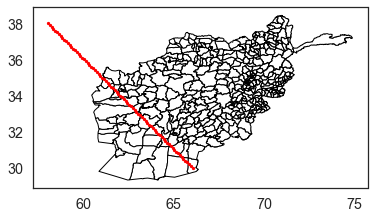

In [7]:
# Plot coordinates with an admin layer

nc_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.long, df.lat))
admin_shp = r"D:\iMMAP\data\Afghanistan\AFG_AdminBoundaries_AGCHO_20211117\Shapefiles\afg_admbnda_adm2_agcho_20211117.shp"
admin_gdf = gpd.read_file(admin_shp)

base = admin_gdf.plot(color='white', edgecolor='black')
nc_gdf.plot(ax=base, marker='o', color='red', markersize=5);


In [8]:
# Trying to get the crs of the data using rioxarray (non available, but most likely EPSG:4326)
nc_crs = nc.rio.crs
print(nc_crs)

None


In [9]:
# View first 5 latitude values
print(nc["dis24"]["latitude"].values[:5])
print(nc["dis24"]["longitude"].values[:5])


print("The min and max latitude values in the data is:", 
      nc["dis24"]["latitude"].values.min(), 
      nc["dis24"]["latitude"].values.max())
print("The min and max longitude values in the data is:", 
      nc["dis24"]["longitude"].values.min(), 
      nc["dis24"]["longitude"].values.max())

[38.05 37.95 37.85 37.75 37.65]
[58.05 58.15 58.25 58.35 58.45]
The min and max latitude values in the data is: 30.049999999999883 38.05
The min and max longitude values in the data is: 58.05 75.04999999999946


In [10]:
print("The earliest date in the data is:", nc["dis24"]["time"].values.min())
print("The latest date in the data is:", nc["dis24"]["time"].values.max())
print(nc["dis24"].values.shape)

The earliest date in the data is: 2022-08-14T00:00:00.000000000
The latest date in the data is: 2022-08-14T00:00:00.000000000
(3, 81, 171)


In [11]:
# View metadata
metadata = nc.attrs
metadata

{'GRIB_edition': 2,
 'GRIB_centre': 'ecmf',
 'GRIB_centreDescription': 'European Centre for Medium-Range Weather Forecasts',
 'GRIB_subCentre': 0,
 'Conventions': 'CF-1.7',
 'institution': 'European Centre for Medium-Range Weather Forecasts',
 'history': '2022-08-15T12:28 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-2.26.0 with {"source": "/cache/tmp/bb620250-6f04-4475-8fa6-8ee82471ec2b-adaptor.mars.external-1660566359.903218-7255-17-tmp.grib", "filter_by_keys": {}, "encode_cf": ["parameter", "time", "geography", "vertical"]}'}

In [12]:
# Select a single x,y combination from the data
key=80
longitude = nc["dis24"]["longitude"].values[key]
latitude = nc["dis24"]["latitude"].values[key]

print("Long, Lat values:", longitude, latitude)


Long, Lat values: 66.04999999999997 30.049999999999883


In [13]:
# Slice the data spatially using a single lat/lon point
one_point = nc["dis24"].sel(lat=30.049, lon=66.049)
one_point

KeyError: 'lat is not a valid dimension or coordinate'